# scikit-learn数据集API介绍
- sklearn.datasets
    - 加载获取流行数据集
    - datasets.load_*()
- 获取小规模数据集，数据包含在datasets里
    - datasets.fetch_*(data_home=None)
    -获取大规模数据集，需要从网络上下载，函数的第一个参数是data_home，表示数据集下载的目录,默认是 ~/scikit_learn_data/

# sklearn数据集返回值介绍
- load和fetch返回的数据类型datasets.base.Bunch(字典格式)
    - data：特征数据数组，是 [n_samples * n_features] 的二维 numpy.ndarray 数组
    - target：标签数组，是 n_samples 的一维 numpy.ndarray 数组
    - DESCR：数据描述
    - feature_names：特征名,新闻数据，手写数字、回归数据集没有
    - target_names：标签名

In [1]:
from sklearn.datasets import load_iris
# 获取鸢尾花数据集
iris = load_iris()
print("鸢尾花数据集的返回值：\n", iris)
# 返回值是一个继承自字典的Bench
print("鸢尾花的特征值:\n", iris["data"])
print("鸢尾花的目标值：\n", iris.target)
print("鸢尾花特征的名字：\n", iris.feature_names)
print("鸢尾花目标值的名字：\n", iris.target_names)
print("鸢尾花的描述：\n", iris.DESCR)

鸢尾花数据集的返回值：
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4

# 查看数据分布
- 通过创建一些图，以查看不同类别是如何通过特征来区分的。 在理想情况下，标签类将由一个或多个特征对完美分隔。 在现实世界中，这种理想情况很少会发生。

- seaborn介绍

- Seaborn 是基于 Matplotlib 核心库进行了更高级的 API 封装，可以让你轻松地画出更漂亮的图形。而 Seaborn 的漂亮主要体现在配色更加舒服、以及图形元素的样式更加细腻。
- 安装  
    - pip3 install seaborn
    - seaborn.lmplot() 是一个非常有用的方法，它会在绘制二维散点图时，自动完成回归拟合

- sns.lmplot() 里的 x, y 分别代表横纵坐标的列名,
- data= 是关联到数据集,
- hue=*代表按照 species即花的类别分类显示,
- fit_reg=是否进行线性拟合。

In [3]:
%matplotlib inline  
# 内嵌绘图
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
# 把数据转换成dataframe的格式
iris_d = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_d['Species'] = iris.target
iris_d.head(100)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


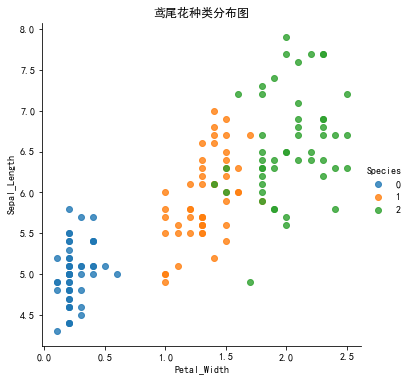

In [5]:
from pylab import mpl
# 设置显示中文字体 否则会乱码
mpl.rcParams["font.sans-serif"] = ["SimHei"]
def plot_iris(iris, col1, col2):
    sns.lmplot(x = col1, y = col2, data = iris, hue = "Species", fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('鸢尾花种类分布图')
    plt.show()
plot_iris(iris_d, 'Petal_Width', 'Sepal_Length')

# 数据集的划分
- 机器学习一般的数据集会划分为两个部分：

    - 训练数据：用于训练，构建模型
    - 测试数据：在模型检验时使用，用于评估模型是否有效

  划分比例：  
      - 训练集：70% 80% 75%
      - 测试集：30% 20% 25%

# 数据集划分api

- sklearn.model_selection.train_test_split(arrays, *options)
- x 数据集的特征值
- y 数据集的标签值
- test_size 测试集的大小，一般为float
- random_state 随机数种子,不同的种子会造成不同的随机采样结果。相同的种子采样结果相同。
- return 测试集特征训练集特征值值，训练标签，测试标签(默认随机取)

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# 1、获取鸢尾花数据集
iris = load_iris()
# 对鸢尾花数据集进行分割
# 训练集的特征值x_train 测试集的特征值x_test 训练集的目标值y_train 测试集的目标值y_test
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)
print("x_train:\n", x_train.shape)
# 随机数种子
x_train1, x_test1, y_train1, y_test1 = train_test_split(iris.data, iris.target, random_state=6)
x_train2, x_test2, y_train2, y_test2 = train_test_split(iris.data, iris.target, random_state=6)
print("如果随机数种子不一致：\n", x_train == x_train1)
print("如果随机数种子一致：\n", x_train1 == x_train2)

x_train:
 (112, 4)
如果随机数种子不一致：
 [[False False False False]
 [False False False False]
 [False False False False]
 [ True False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False  True]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False  True]
 [False False False  True]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False Fal

# 特征工程-特征预处理
- 通过一些转换函数将特征数据转换成更加适合算法模型的特征数据过程  
- 为什么我们要进行归一化/标准化？  
特征的单位或者大小相差较大，或者某特征的方差相比其他的特征要大出几个数量级，容易影响（支配）目标结果，使得一些算法无法学习到其它的特征

特征预处理API  
sklearn.preprocessing

  归一化
-  定义
    - 通过对原始数据进行变换把数据映射到(默认为[0,1])之间
- API
    - sklearn.preprocessing.MinMaxScaler (feature_range=(0,1)… )
    - MinMaxScalar.fit_transform(X)
    - X:numpy array格式的数据[n_samples,n_features]
    - 返回值：转换后的形状相同的array

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
 
def minmax_demo():
    """
    归一化演示
    :return: None
    """
    data = pd.read_csv("dating.txt")
    print(data)
    # 1、实例化一个转换器类
    transfer = MinMaxScaler(feature_range=(2, 3))
    # 2、调用fit_transform
    data = transfer.fit_transform(data[['milage','Liters','Consumtime']])
    print("最小值最大值归一化处理的结果：\n", data)
 
    return None

# 标准化
定义
- 通过对原始数据进行变换把数据变换到均值为0,标准差为1范围内

对于归一化来说：如果出现异常点，影响了最大值和最小值，那么结果显然会发生改变
  对于标准化来说：如果出现异常点，由于具有一定数据量，少量的异常点对于平均值的影响并不大，从而方差改变较小。
  
- API
    - sklearn.preprocessing.StandardScaler( )
    - 处理之后每列来说所有数据都聚集在均值0附近标准差差为1
    - StandardScaler.fit_transform(X)
    - X:numpy array格式的数据[n_samples,n_features]
    - 返回值：转换后的形状相同的array
    
 在已有样本足够多的情况下比较稳定，适合现代嘈杂大数据场景。

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
def stand_demo():
    """
    标准化演示
    :return: None
    """
    data = pd.read_csv("dating.txt")
    print(data)
    # 1、实例化一个转换器类
    transfer = StandardScaler()
    # 2、调用fit_transform
    data = transfer.fit_transform(data[['milage','Liters','Consumtime']])
    print("标准化的结果:\n", data)
    print("每一列特征的平均值：\n", transfer.mean_)
    print("每一列特征的方差：\n", transfer.var_)
 
    return None

# 鸢尾花种类预测—流程实现
## K-近邻算法API
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,algorithm='auto')
- n_neighbors：
    - int,可选（默认= 5），k_neighbors查询默认使用的邻居数
- algorithm：{‘auto’，‘ball_tree’，‘kd_tree’，‘brute’}
    - 快速k近邻搜索算法，默认参数为auto，可以理解为算法自己决定合适的搜索算法。除此之外，用户也可以自己指定搜索算法ball_tree、kd_tree、brute方法进行搜索，
    - brute是蛮力搜索，也就是线性扫描，当训练集很大时，计算非常耗时。
    - kd_tree，构造kd树存储数据以便对其进行快速检索的树形数据结构，kd树也就是数据结构中的二叉树。以中值切分构造的树，每个结点是一个超矩形，在维数小于20时效率高。
    - ball tree是为了克服kd树高纬失效而发明的，其构造过程是以质心C和半径r分割样本空间，每个节点是一个超球体。

# 导入模块

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 先从sklearn当中获取数据集，然后进行数据集的分割

In [9]:
# 1.获取数据集
iris = load_iris()
 
# 2.数据基本处理
# x_train,x_test,y_train,y_test为训练集特征值、测试集特征值、训练集目标值、测试集目标值
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)

# 进行数据标准化
特征值的标准化

In [10]:
# 3、特征工程：标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 模型进行训练预测

In [11]:
# 4、机器学习(模型训练)
estimator = KNeighborsClassifier(n_neighbors=9)
estimator.fit(x_train, y_train)
# 5、模型评估
# 方法1：比对真实值和预测值
y_predict = estimator.predict(x_test)
print("预测结果为:\n", y_predict)
print("比对真实值和预测值：\n", y_predict == y_test)
# 方法2：直接计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

预测结果为:
 [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
比对真实值和预测值：
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
准确率为：
 0.9333333333333333


# 交叉验证，网格搜索（模型选择与调优）API：
- sklearn.model_selection.GridSearchCV(estimator, param_grid=None,cv=None)
- 对估计器的指定参数值进行详尽搜索
    - estimator：估计器对象
    - param_grid：估计器参数(dict){“n_neighbors”:[1,3,5]}
    - cv：指定几折交叉验证
 
     -fit：输入训练数据
    - score：准确率
结果分析：
bestscore__:在交叉验证中验证的最好结果  
bestestimator：最好的参数模型  
cvresults:每次交叉验证后的验证集准确率结果和训练集准确率结果

In [13]:
from sklearn.model_selection import GridSearchCV
# 1、获取数据集
iris = load_iris()
# 2、数据基本处理 -- 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)
# 3、特征工程：标准化
# 实例化一个转换器类
transfer = StandardScaler()
# 调用fit_transform
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
# 4、KNN预估器流程
#  4.1 实例化预估器类
estimator = KNeighborsClassifier()
 
# 4.2 模型选择与调优——网格搜索和交叉验证
# 准备要调的超参数
param_dict = {"n_neighbors": [1, 3, 5]}
estimator = GridSearchCV(estimator, param_grid=param_dict, cv=3)
# 4.3 fit数据进行训练
estimator.fit(x_train, y_train)
# 5、评估模型效果
# 方法a：比对预测结果和真实值
y_predict = estimator.predict(x_test)
print("比对预测结果和真实值：\n", y_predict == y_test)
# 方法b：直接计算准确率
score = estimator.score(x_test, y_test)
print("直接计算准确率：\n", score)

比对预测结果和真实值：
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
直接计算准确率：
 0.9473684210526315


In [14]:
print("在交叉验证中验证的最好结果：\n", estimator.best_score_)
print("最好的参数模型：\n", estimator.best_estimator_)
print("每次交叉验证后的准确率结果：\n", estimator.cv_results_)

在交叉验证中验证的最好结果：
 0.9732100521574205
最好的参数模型：
 KNeighborsClassifier()
每次交叉验证后的准确率结果：
 {'mean_fit_time': array([0.00099659, 0.00033371, 0.00132855]), 'std_fit_time': array([1.34869915e-06, 4.71932312e-04, 4.71314409e-04]), 'mean_score_time': array([0.00333476, 0.01030342, 0.00498708]), 'std_score_time': array([0.0009479 , 0.00577832, 0.0014095 ]), 'param_n_neighbors': masked_array(data=[1, 3, 5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}], 'split0_test_score': array([0.97368421, 0.97368421, 0.97368421]), 'split1_test_score': array([0.97297297, 0.97297297, 0.97297297]), 'split2_test_score': array([0.94594595, 0.89189189, 0.97297297]), 'mean_test_score': array([0.96420104, 0.94618303, 0.97321005]), 'std_test_score': array([0.01291157, 0.03839073, 0.00033528]), 'rank_test_score': array([2, 3, 1])}


# 预测facebook签到位置

In [15]:
# 1、获取数据集
facebook = pd.read_csv("./data/FBlocation/train.csv")
facebook.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [16]:
# 2.基本数据处理
# 2.1 缩小数据范围
facebook_data = facebook.query("x>2.0 & x<2.5 & y>2.0 & y<2.5")
print(facebook_data)

            row_id       x       y  accuracy    time    place_id
163            163  2.1663  2.3755        84  669737  3869813743
310            310  2.3695  2.2034         3  234719  2636621520
658            658  2.3236  2.1768        66  502343  7877745055
1368          1368  2.2613  2.3392        73  319822  9775192577
1627          1627  2.3331  2.0011        66  595084  6731326909
...            ...     ...     ...       ...     ...         ...
29116142  29116142  2.0804  2.0657       168  217886  1247398579
29116267  29116267  2.4309  2.4646        33  314360  1951613663
29116295  29116295  2.1797  2.1707        89   74954  4724115005
29116475  29116475  2.3924  2.2704        62  206257  2819110495
29117203  29117203  2.4942  2.2430        11  160483  2634419689

[71664 rows x 6 columns]


In [17]:
# 2.2 选择时间特征
time = pd.to_datetime(facebook_data["time"], unit="s")
print(time)
time = pd.DatetimeIndex(time)
print(time)

163        1970-01-08 18:02:17
310        1970-01-03 17:11:59
658        1970-01-06 19:32:23
1368       1970-01-04 16:50:22
1627       1970-01-07 21:18:04
                   ...        
29116142   1970-01-03 12:31:26
29116267   1970-01-04 15:19:20
29116295   1970-01-01 20:49:14
29116475   1970-01-03 09:17:37
29117203   1970-01-02 20:34:43
Name: time, Length: 71664, dtype: datetime64[ns]
DatetimeIndex(['1970-01-08 18:02:17', '1970-01-03 17:11:59',
               '1970-01-06 19:32:23', '1970-01-04 16:50:22',
               '1970-01-07 21:18:04', '1970-01-02 03:14:59',
               '1970-01-07 03:45:16', '1970-01-05 03:28:43',
               '1970-01-01 18:59:03', '1970-01-09 07:50:12',
               ...
               '1970-01-09 20:03:34', '1970-01-08 09:26:50',
               '1970-01-07 04:45:59', '1970-01-07 22:36:18',
               '1970-01-06 23:29:43', '1970-01-03 12:31:26',
               '1970-01-04 15:19:20', '1970-01-01 20:49:14',
               '1970-01-03 09:17:37', '197

In [18]:
facebook_data["day"] = time.day
facebook_data["hour"] = time.hour
facebook_data["weekday"] = time.weekday
# 2.3 去掉签到较少的地方
place_count = facebook_data.groupby("place_id").count()
place_count = place_count[place_count["row_id"]>3]
facebook_data = facebook_data[facebook_data["place_id"].isin(place_count.index)]
# 2.4 确定特征值和目标值
x = facebook_data[["x", "y", "accuracy", "day", "hour", "weekday"]]
y = facebook_data["place_id"]
# 2.5 分割数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

<ipython-input-18-ee8df5ca791f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook_data["day"] = time.day
<ipython-input-18-ee8df5ca791f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook_data["hour"] = time.hour
<ipython-input-18-ee8df5ca791f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [19]:
# 3.特征工程--特征预处理(标准化)
# 3.1 实例化一个转换器
transfer = StandardScaler()
# 3.2 调用fit_transform
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

In [20]:
# 4.机器学习--knn+cv
# 4.1 实例化一个估计器
estimator = KNeighborsClassifier()
# 4.2 调用gridsearchCV
param_grid = {"n_neighbors": [1, 3, 5, 7, 9]}
estimator = GridSearchCV(estimator, param_grid=param_grid, cv=5)
# 4.3 模型训练
estimator.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [21]:
# 5.模型评估
# 5.1 基本评估方式
score = estimator.score(x_test, y_test)
print("最后预测的准确率为:\n", score)
 
y_predict = estimator.predict(x_test)
print("最后的预测值为:\n", y_predict)
print("预测值和真实值的对比情况:\n", y_predict == y_test)
 
# 5.2 使用交叉验证后的评估方式
print("在交叉验证中验证的最好结果:\n", estimator.best_score_)
print("最好的参数模型:\n", estimator.best_estimator_)
print("每次交叉验证后的验证集准确率结果和训练集准确率结果:\n",estimator.cv_results_)

最后预测的准确率为:
 0.36567336567336567
最后的预测值为:
 [9983648790 6329243787 9674001925 ... 2990018952 4830766946 7065571836]
预测值和真实值的对比情况:
 24703810     True
19445902    False
18490063     True
7762709     False
6505956     False
            ...  
27632888    False
23367671    False
6692268      True
25834435    False
13319005    False
Name: place_id, Length: 17316, dtype: bool
在交叉验证中验证的最好结果:
 0.3546044971864908
最好的参数模型:
 KNeighborsClassifier(n_neighbors=1)
每次交叉验证后的验证集准确率结果和训练集准确率结果:
 {'mean_fit_time': array([0.12548389, 0.12567258, 0.1282548 , 0.11847577, 0.12924795]), 'std_fit_time': array([0.01872097, 0.01174596, 0.01283917, 0.00248055, 0.02060003]), 'mean_score_time': array([0.53894734, 0.62611489, 0.66263452, 0.69913774, 0.85134058]), 'std_score_time': array([0.0156886 , 0.04317863, 0.02870258, 0.01524681, 0.0871797 ]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'